In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, skewnorm
from scipy.optimize import curve_fit

df = pd.read_csv(r"data\pmt_spectroscopy\vp2ps_20250320-181313_co60_12h_20cm.csv")  
df['mV'] = df['V'] * 1000


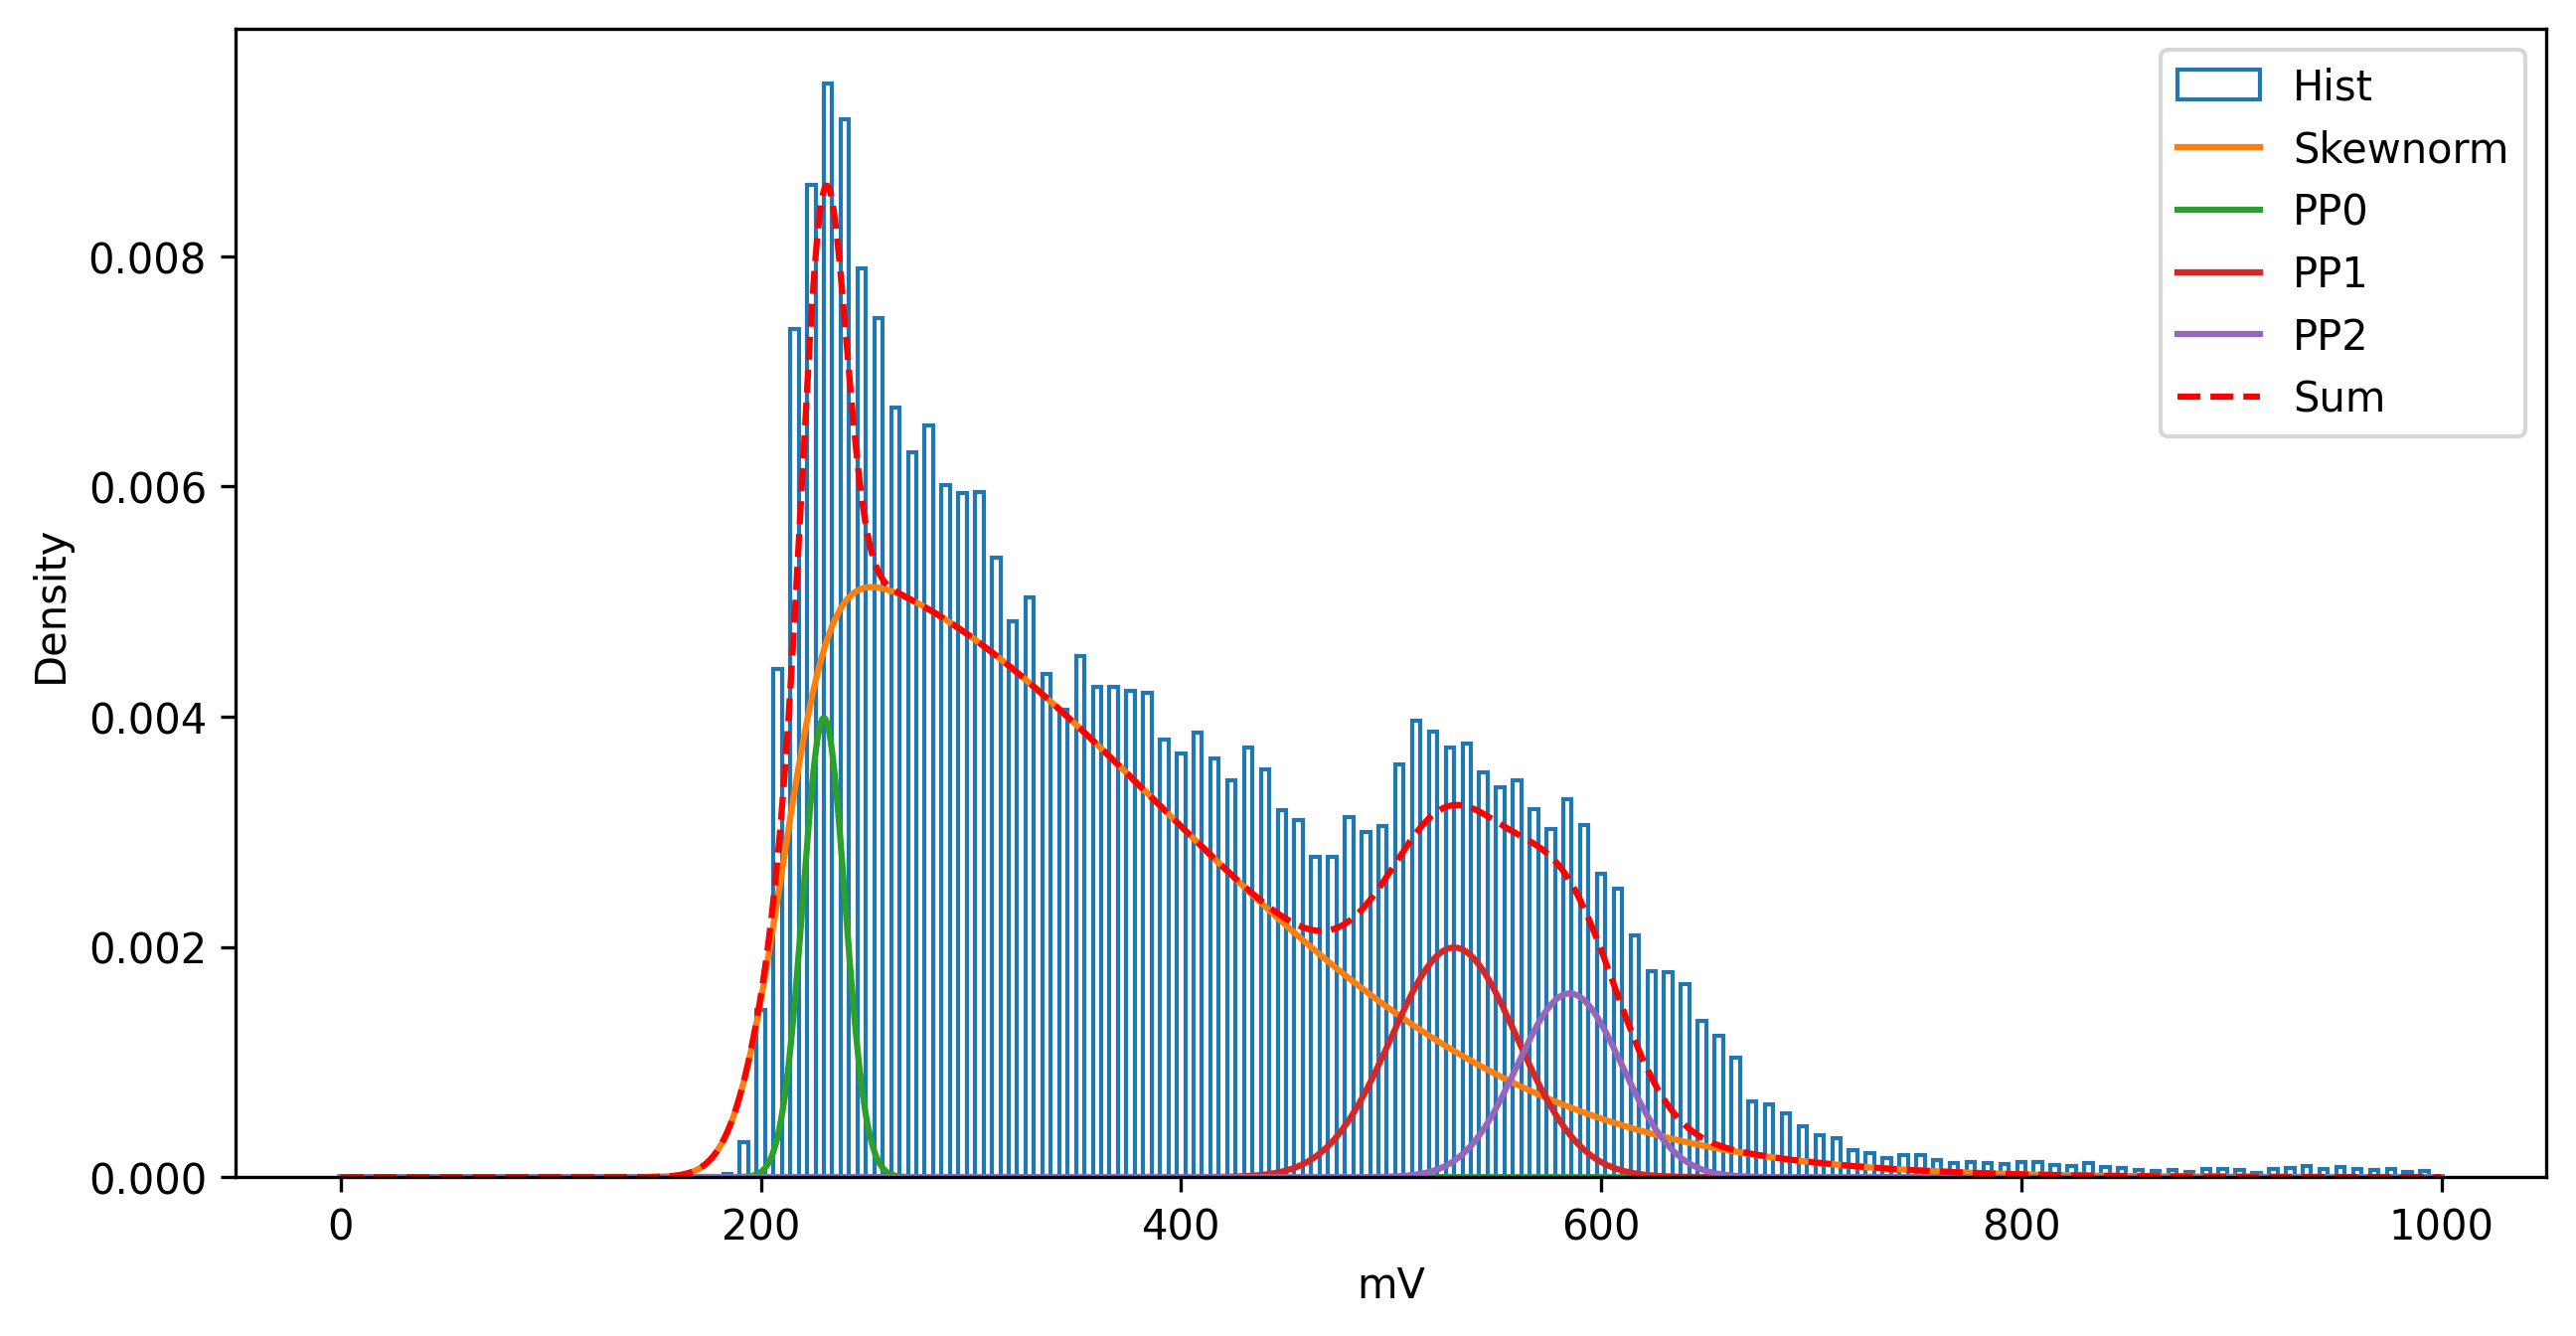

In [46]:
def skewnorm_pdf( x, A, a, loc, scale):
    return A * skewnorm.pdf(x, a, loc, scale)

x = np.linspace(0, 1000, 5000)

y_skewnorm = 1.2*skewnorm_pdf(x, 1, 10, 210, 180)

y_pp0 = 0.1*norm.pdf(x, 230, 10)

y_pp1= 0.15*norm.pdf(x, 530, 30)
y_pp2= 0.1*norm.pdf(x, 585, 25)

bins = np.arange(4 - 2,1000 + 2, 4)


y_sum = y_skewnorm + y_pp1 + y_pp2 + y_pp0
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
ax.hist(df["mV"], bins=bins, density=True, label='Hist', histtype='step')
ax.plot(x, y_skewnorm, label='Skewnorm')
ax.plot(x, y_pp0, label='PP0')
ax.plot(x, y_pp1, label='PP1')
ax.plot(x, y_pp2, label='PP2')
ax.plot(x, y_sum, label='Sum', color = 'red', linestyle = '--')

ax.legend()
ax.set_xlabel('mV')
ax.set_ylabel('Density')
plt.show()

[ 10.          19.99999995 219.99992672 165.24112383   1.
 235.41407865   9.36147778   1.         285.889095    21.696168
   1.         410.11091779  25.06439827]


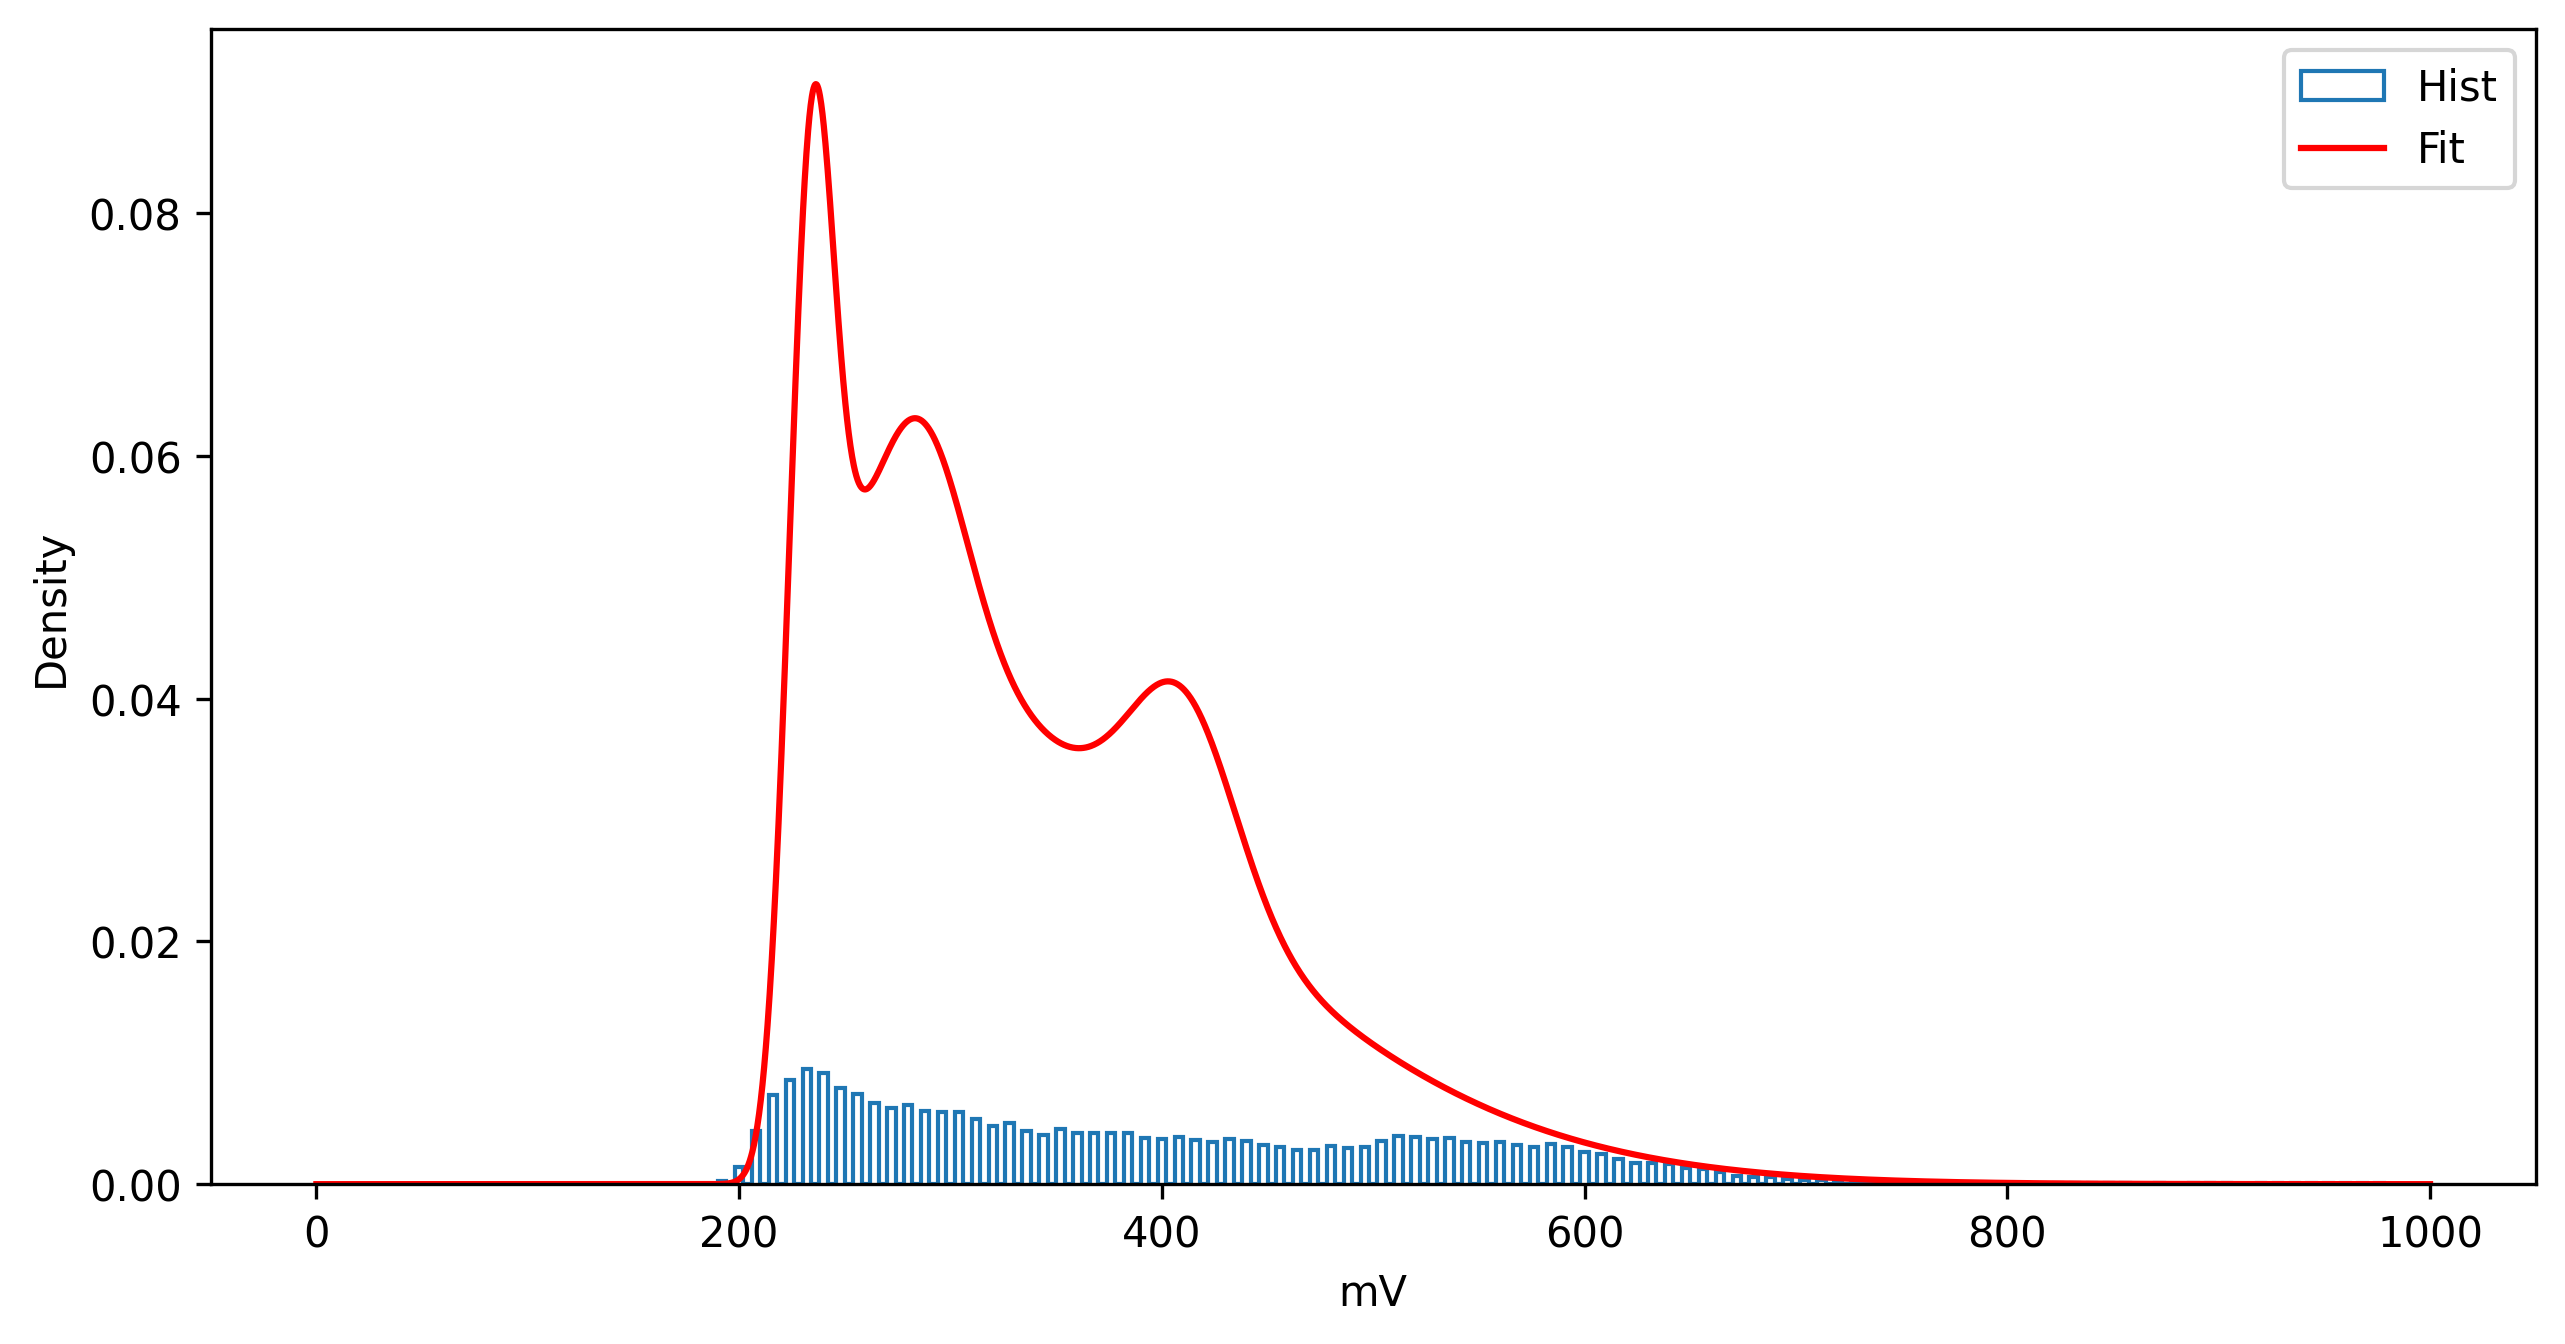

In [ ]:
# parameters  - (min, guess, max)
skewnorm_A = (0, 1, 10)
skewnorm_a = (0, 10, 20)
skewnorm_loc = (0, 200, 220)
skewnorm_scale = (0, 100, 200)

ypp0_A = (0, 0.1, 1)
ypp0_loc = (0, 200, 250)
ypp0_scale = (0, 5, 20)

ypp1_A = (0, 0.1, 1)
ypp1_loc = (0, 500, 600)
ypp1_scale = (0, 10, 40)

ypp2_A = (0, 0.1, 1)
ypp2_loc = (0, 550, 600)
ypp2_scale = (0, 10, 40)
params = (skewnorm_A, skewnorm_a, skewnorm_loc, skewnorm_scale, ypp0_A, ypp0_loc, ypp0_scale, ypp1_A, ypp1_loc, ypp1_scale, ypp2_A, ypp2_loc, ypp2_scale)

lower_bounds = [param[0] for param in params]
upper_bounds = [param[2] for param in params]
bounds = (lower_bounds, upper_bounds)
guess = [param[1] for param in params]


def total_fit_function(x, A_skewnorm, a_skewnorm, loc_skewnorm, scale_skewnorm, A_pp0, loc_pp0, scale_pp0, A_pp1, loc_pp1, scale_pp1, A_pp2, loc_pp2, scale_pp2):
    skew = skewnorm_pdf(x, A_skewnorm, a_skewnorm, loc_skewnorm, scale_skewnorm) 
    g0 = norm.pdf(x, loc_pp0, scale_pp0) * A_pp0 
    g1 = norm.pdf(x, loc_pp1, scale_pp1) * A_pp1 
    g2 = norm.pdf(x, loc_pp2, scale_pp2) * A_pp2
    return skew + g0 + g1 + g2

counts, bins = np.histogram(df["mV"], bins=bins, density=True)
x_hist = (bins[:-1] + bins[1:]) / 2


popt, pcov = curve_fit(total_fit_function, x_hist, counts , p0=guess, bounds=bounds)
print(popt)

y_fit = total_fit_function(x, *popt)
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
ax.hist(df["mV"], bins=bins, density=True, label='Hist', histtype='step')
ax.plot(x, y_fit, label='Fit', color='red')
ax.legend()
ax.set_xlabel('mV')
ax.set_ylabel('Density')
plt.show()